# Titanic Data Analysis

## Some Questions to Answer

The dataset includes the fields below :

- passengerId -> the unique identifier of passenger
- Survived -> 1 or 0, survived or not
- Pclass -> Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
- Name
- Sex
- Age 
- Sibsp -> # of splings or spous on board
- Parch -> # of parents / childer on board
- Ticket -> Ticket Number
- Fare -> Ticket Fare
- Cabin -> the cabin number
- Embraked -> Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


Based on this fields, below questions may be asked to be answered :

- Was the "Women and Childern first" rule applied on the disaster  ?
- What is the effect of number of family members on a survival rate of a person ?
- Is there any effect of ticket class and fare on the survival ? 




## Preliminery Analysis



In [14]:
import pandas as pd

titanic_data = pd.read_csv("titanic.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
print titanic_data.shape
titanic_data.describe()

(891, 12)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


As seen above, titanic data has 891 rows however age fields of 177 rows are missing.

So that, firstly the NaN values need to be filled or those rows can be removed. Instead of removing the rows, I prefer to fill those missing values.

In order to fill the missing values, mean or median of age field can be used. In this case I prefer to use median.


In [16]:
age_median = titanic_data['Age'].median()
titanic_data['Age'] = titanic_data['Age'].fillna(age_median) 
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Checking Other Mising Values

Lets check for other missing values.


In [17]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

So that, Cabin and Embarked fields still have missing values. Lets fill those fields.
Cabin field is a categorical data, so it is going to be filled with "UNKNOWN".

In [18]:
titanic_data["Cabin"] = titanic_data["Cabin"].fillna("UNKNOWN")
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

Now lets fill Embarked field.

In [19]:
titanic_data.groupby("Embarked").count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Embarked,,,,,,,,,,,
C,168,168,168,168,168,168,168,168,168,168,168
Q,77,77,77,77,77,77,77,77,77,77,77
S,644,644,644,644,644,644,644,644,644,644,644


Embarked field has C, Q, and S. So missing values are filled with "U" indicating unknown.


In [20]:
titanic_data["Embarked"] = titanic_data["Embarked"].fillna("U")
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Now the missing values are filled. The operations on age field will continue on the next sections.

## Analysis On Fields


### Sex


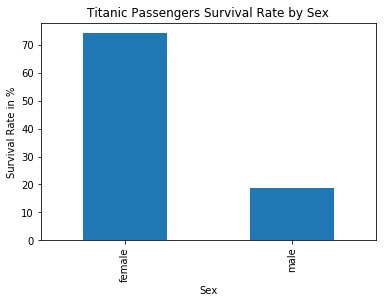

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

# Sex distribution based on survival rate
survived_sex = titanic_data[titanic_data['Survived']==1]['Sex'].value_counts()
not_survived_sex = titanic_data[titanic_data['Survived']==0]['Sex'].value_counts()

# This function will be used multiple times.
# NEw plotting is changed 
def plot_survival_rate_by_field(field_name):
    gb = titanic_data.groupby(field_name)['Survived'].mean()*100
    plot = gb.plot(kind='bar', title="Titanic Passengers Survival Rate by " + field_name)
    plot.set_xlabel(field_name)
    plot.set_ylabel("Survival Rate in %")
    
    
    
plot_survival_rate_by_field("Sex")

As seen in plots above, The survival rate of women is higher than man. There seems a correlation between the gender and survival rate. 

### Age

For analyzing age, an new field is created by categorizing ages into groups such as infant, child, youth, adult and old. 


Please Refer to : http://www.widener.edu/about/campus_resources/wolfgram_library/documents/life_span_chart_final.pdf

In [22]:
# NEW : Age Group Generation
max_age = titanic_data['Age'].max()
age_labels = ["INFANT", "CHILD", "YOUTH", "ADULT", "MIDDLEAGE", "OLD"]    
titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'],
                                  [0, 2, 12, 25, 40, 60, max_age],
                                  labels=age_labels)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,UNKNOWN,S,YOUTH
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,ADULT
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,UNKNOWN,S,ADULT
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,ADULT
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,UNKNOWN,S,ADULT


Now all ages were categorized into groups. Lets visualize the relation between age groups and survival. In order to see properly, the data needs to be normalized based on the distribution of age groups in the whole data.

In order to find the survival ratio, for each age group the number of survivors are divided by the number of attendees.


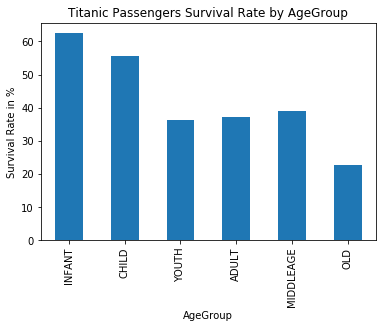

In [23]:
# Age Group distribution based on survival rate
plot_survival_rate_by_field("AgeGroup")


The youngers survival rate is higher than the olders based on the plot above. So that, age is effective on survival.

> __Was the "Women and Childern first" rule applied on the disaster ?__
Based on the analysis on Sex and Age fields, women and younger people survived more in the disaster.



### Family Members

In order to analyze the effect of number of family members to survival rate, a new field will be created as FamMem which is simply the sum of SibSp and Parch fields. This fields show that the number of family members on board.

In [25]:
titanic_data['NumberOfFamilyMembers'] = titanic_data['SibSp'] + titanic_data['Parch']

def fam_group(femSize):
    if femSize == 0:
        return "SINGLE"
    elif femSize > 0 and femSize < 5:
        return "SMALLFAMILY"
    elif femSize > 5:
        return "LARGEFAMILY"
    
    
titanic_data['GroupByFamilySize'] = titanic_data['NumberOfFamilyMembers'].apply(fam_group)
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,NumberOfFamilyMembers,GroupByFamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,UNKNOWN,S,YOUTH,1,SMALLFAMILY
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,ADULT,1,SMALLFAMILY
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,UNKNOWN,S,ADULT,0,SINGLE
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,ADULT,1,SMALLFAMILY
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,UNKNOWN,S,ADULT,0,SINGLE


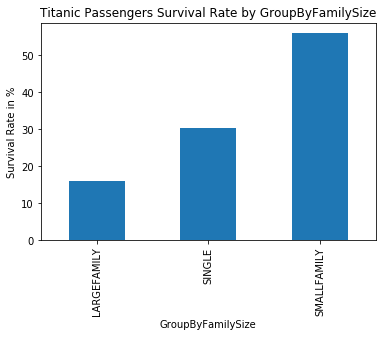

In [26]:
# Normalization
plot_survival_rate_by_field("GroupByFamilySize")



> __What is the effect of number of family members on a survival rate of a person ?__
Based on the family size of the passengers, the passengers who have a large family are less likely to survive comparing to singles and small families.

### Fare & Ticket Class

In order to investigate whether the wealth is effective on survival in the disaster, ticket fares and ticket class are need to by analyzed. First of all, in order to see the correlation of these two fields the histogram is drawn.

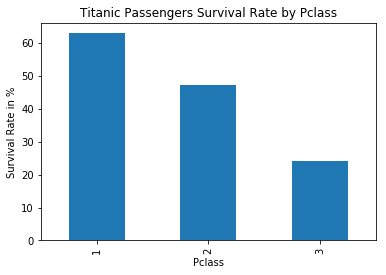

In [27]:
## 1st, 2nd, 3rd
plot_survival_rate_by_field("Pclass")


In [28]:
titanic_data["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

So Fare changes between 0 - 512.3292. The cut points might be 0 - 50, 50 - 200 and 200 - max_value.
I have selected cut values using the histogram below.

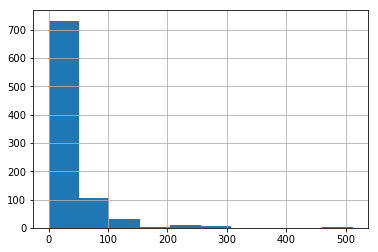

In [29]:
titanic_data["Fare"].hist()

In [104]:
fare_labels = ["LOW", "MID", "HIGH"] 
max_fare = titanic_data['Fare'].max()
titanic_data['FareGroup'] = pd.cut(titanic_data['Fare'],
                                  [0, 50, 200, max_fare],
                                  labels=fare_labels)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FemMem,FemGroup,FareGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,UNKNOWN,S,YOUTH,1,SMALLFEM,LOW
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,ADULT,1,SMALLFEM,MID
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,UNKNOWN,S,ADULT,0,SINGLE,LOW
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,ADULT,1,SMALLFEM,MID
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,UNKNOWN,S,ADULT,0,SINGLE,LOW


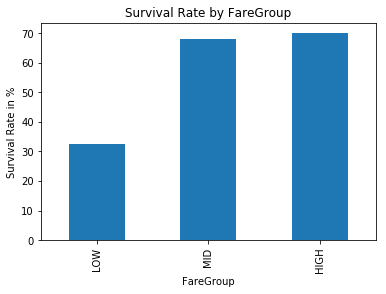

In [105]:
plot_survival_rate_by_field("FareGroup")

So it is seen that, survival rate of lover class passengers is less then the higher class passengers according to ticket fares and classes.

Passengers who has lower fare tickets seems to be dead more likely. The reason might be rescuing the passengers with higher fare tickets before the lower ones.

> __- Is there any effect of ticket class and fare on the survival ? __ Ticket fares and class of passengers are seemed to be correlated with survival rate based on the analysis. Higher class passengers were less likely to be dead. 

### One More Analysis

The correlation of fields in the data can also be found using pandas built-in functions.

In [106]:

titanic_data.corr()['Survived'].abs().sort_values()


PassengerId    0.005007
FemMem         0.016639
SibSp          0.035322
Age            0.064910
Parch          0.081629
Fare           0.257307
Pclass         0.338481
Survived       1.000000
Name: Survived, dtype: float64

As seen in the correlations above, SexN, Pclass, Fare, AgeGroupN are most correlated with survived field.

## Conclusion

There are 3 questions I have asked based on the data.

>- Was the "Women and Childern first" rule applied on the disaster  ?
- What is the effect of number of family members on a survival rate of a person ?
- Is there any effect of ticket class and fare on the survival ? 

Based on the analysis, 

- Women and children in titanic survived more, however the age of some passengers were missing and filled with median of all ages.
- Persons who have large families are survived less based on the data provided. 
- Lower class passengers survived less.

All the analysis above are done by filling some missing values and the provided data set is a small subset of passengers. Please read this report considering those limitations.







## References


http://pandas.pydata.org/pandas-docs/stable/